# Session 1: AI Concepts Visualized
## 1. The Curse of Dimensionality

## Exercise 1: The Curse of Dimensionality
This exercise demonstrates why "distance" becomes meaningless in high-dimensional spaces (like the embedding space of an LLM). As we add dimensions, all points become roughly equidistant, making clustering difficult.

### Why High-Dimensional Space is "Empty"

This code simulates one of the most important phenomena in data science: the **Curse of Dimensionality**. It answers the question: *"If I scatter random points in a box, how far apart are they?"*

### Code Logic Breakdown

1.  **The Setup (`simulate_dimensionality`):**
    * We define a list of dimensions to test: `[1, 2, 3, 100]`.
    * For each dimension, we generate `100` random points. These points exist inside a "unit hypercube" (coordinates between 0 and 1).

2.  **Distance Calculation (`pdist`):**
    * `data = np.random.rand(n_points, d)` creates the points.
    * `distances = pdist(data)` calculates the Euclidean distance between **every possible pair** of points.
    * *Note:* If we have 100 points, we calculate roughly 5,000 unique distances.

3.  **Measuring the Spread:**
    * We look at the **Minimum** distance (closest pair) and **Maximum** distance (furthest pair).
    * We calculate a ratio to see the "relative spread."

4.  **The Visualization (Histograms):**
    * We plot the distribution of these distances for each dimension.

### Interpreting the Output

* **Dim 1 & 2 (Low Dimensions):**
    * 
    * **Visual:** The histogram is wide and spread out.
    * **Meaning:** In 2D, some points are very close neighbors, and others are far away. Distance is a meaningful metric for distinguishing "similar" vs. "dissimilar" items.

* **Dim 100 (High Dimensions):**
    * 
    * **Visual:** The histogram becomes a sharp, thin bell curve centered far to the right.
    * **Meaning:** In 100D, the concept of "neighbors" vanishes. The distance to the *nearest* neighbor is almost the same as the distance to the *furthest* neighbor.
    * **Implication:** This is why simple algorithms (like K-Nearest Neighbors) often fail in high-dimensional AI tasks without dimensionality reduction (like PCA or embeddings).

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

Dim 1: Min Dist=0.00, Max Dist=0.96, Spread Ratio=12986.96
Dim 2: Min Dist=0.01, Max Dist=1.23, Spread Ratio=122.54
Dim 3: Min Dist=0.03, Max Dist=1.45, Spread Ratio=51.56
Dim 100: Min Dist=3.33, Max Dist=4.96, Spread Ratio=0.49


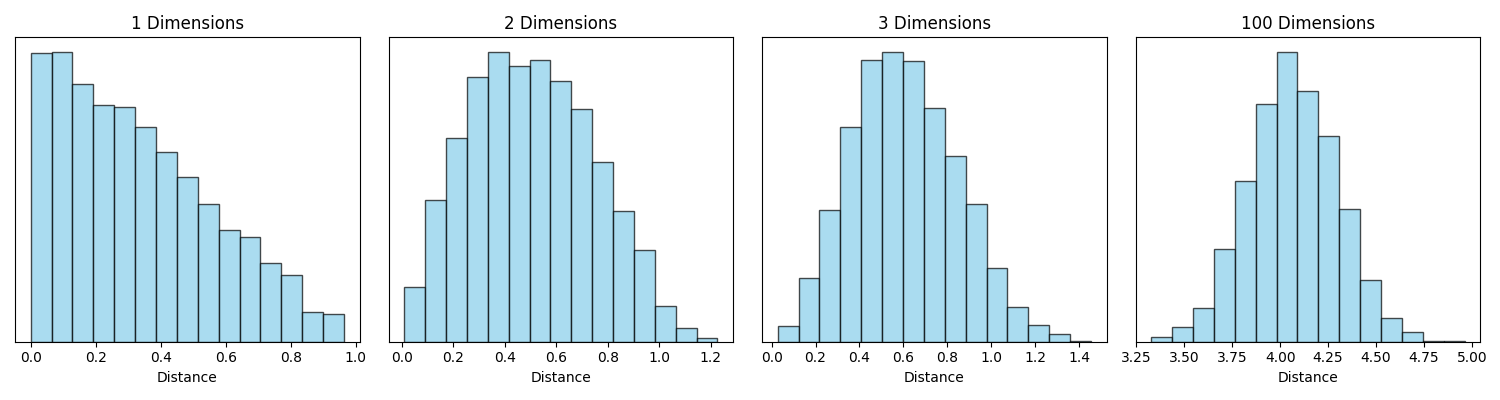

In [2]:
from scipy.spatial.distance import pdist, squareform

def simulate_dimensionality(n_points=100, dims=[1, 2, 3, 100]):
    plt.figure(figsize=(15, 4))

    for i, d in enumerate(dims):
        # Generate random points in d-dimensional hypercube [0,1]
        data = np.random.rand(n_points, d)

        # Calculate pairwise distances between all points
        distances = pdist(data)

        # Calculate min and max distance stats
        min_dist = np.min(distances)
        max_dist = np.max(distances)
        ratio = (max_dist - min_dist) / min_dist

        # Plot
        plt.subplot(1, 4, i+1)
        plt.hist(distances, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title(f'{d} Dimensions')
        plt.xlabel('Distance')
        plt.yticks([])

        print(f"Dim {d}: Min Dist={min_dist:.2f}, Max Dist={max_dist:.2f}, Spread Ratio={ratio:.2f}")

    plt.tight_layout()
    plt.show()

simulate_dimensionality()

**Observation:** Notice that in 1D or 2D, we have a wide spread of distances (some points are very close, some are very far). In 100D, the histogram becomes a tight bell curve. All points are essentially "the same distance" away from each other.

## From Lines to Hypercubes

This example demonstrates how data points behave as we increase the complexity of the space they inhabit. This is a fundamental concept in Machine Learning known as **feature expansion**.

### What the Code Does
We start with simple 1D data and progressively add dimensions (features), observing how the relationship between points changes.

1.  **1D Space (The Line):**
    * We have three points: `a`, `b`, and `c`.
    * `a` and `b` are close together (distance 1). `c` is far away at 10.
    * *Analogy:* This is like classifying houses based only on **Size**.

2.  **2D Space (The Plane):**
    * We keep the original points on the X-axis ($y=0$) but introduce a new dimension (Y).
    * We add point `D` at $(10, 10)$.
    * Notice how `D` is "above" `c`. The space is getting larger, allowing for more complex relationships.
    * *Analogy:* Now we classify houses based on **Size** AND **Price**.

3.  **3D Space (The Cube):**
    * We expand again into the Z-axis.
    * We add point `E` at $(10, 10, 10)$.
    * The points that were once "crowded" on the line now have massive amounts of empty space around them.

### Key Takeaway for AI
In this example, we manually added dimensions. In Deep Learning, the "Hidden Layers" of a Neural Network automatically perform this expansion. They project input data into higher-dimensional space to make it easier to separate classes (e.g., separating "Cats" from "Dogs" might be impossible in 2D pixel space, but easy in 1000D feature space).

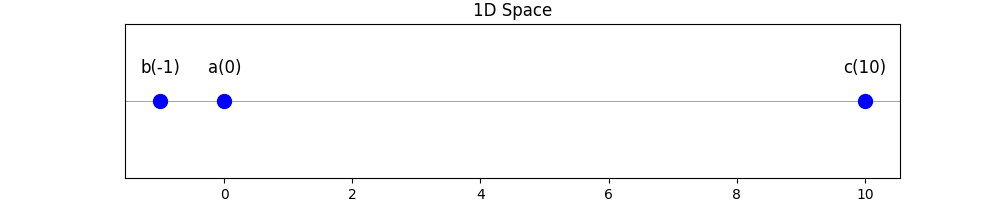

In [3]:
# Define 1D points
points_1d = {'a': 0, 'b': -1, 'c': 10}

plt.figure(figsize=(10, 2))
# Plot scatter points: y-coordinates are all 0 for 1D
plt.scatter(points_1d.values(), [0]*len(points_1d), color='blue', s=100)
plt.axhline(0, color='gray', linewidth=0.5, zorder=0)

# Label points
for name, x in points_1d.items():
    plt.text(x, 0.02, f"{name}({x})", ha='center', fontsize=12)

plt.title("1D Space")
plt.xlabel("X Dimension")
plt.yticks([])  # Hide y-axis
plt.show()

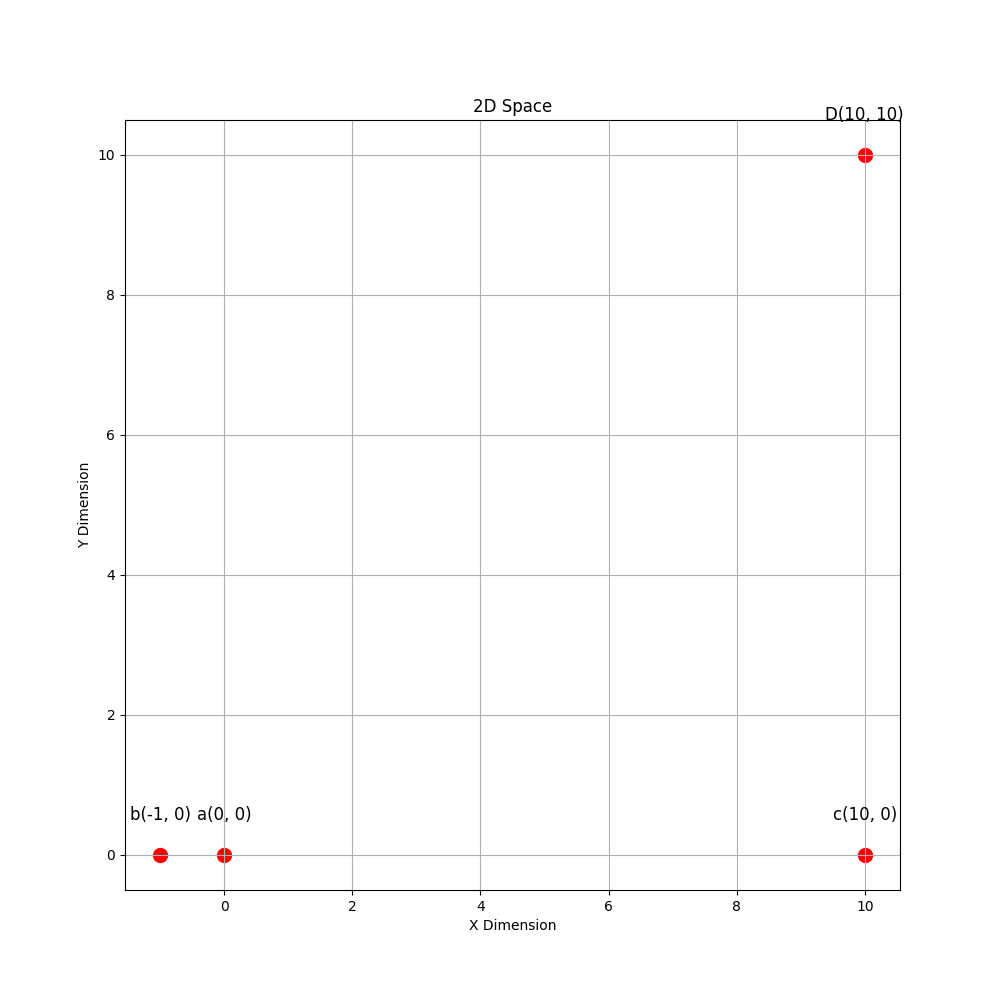

In [4]:
# Define 2D points (Previous points get y=0)
points_2d = {
    'a': (0, 0),
    'b': (-1, 0),
    'c': (10, 0),
    'D': (10, 10)
}

x_vals = [p[0] for p in points_2d.values()]
y_vals = [p[1] for p in points_2d.values()]

plt.figure(figsize=(10, 10))
plt.scatter(x_vals, y_vals, color='red', s=100)

for name, (x, y) in points_2d.items():
    plt.text(x, y + 0.5, f"{name}{x,y}", ha='center', fontsize=12)

plt.title("2D Space")
plt.xlabel("X Dimension")
plt.ylabel("Y Dimension")
plt.grid(True)
plt.show()

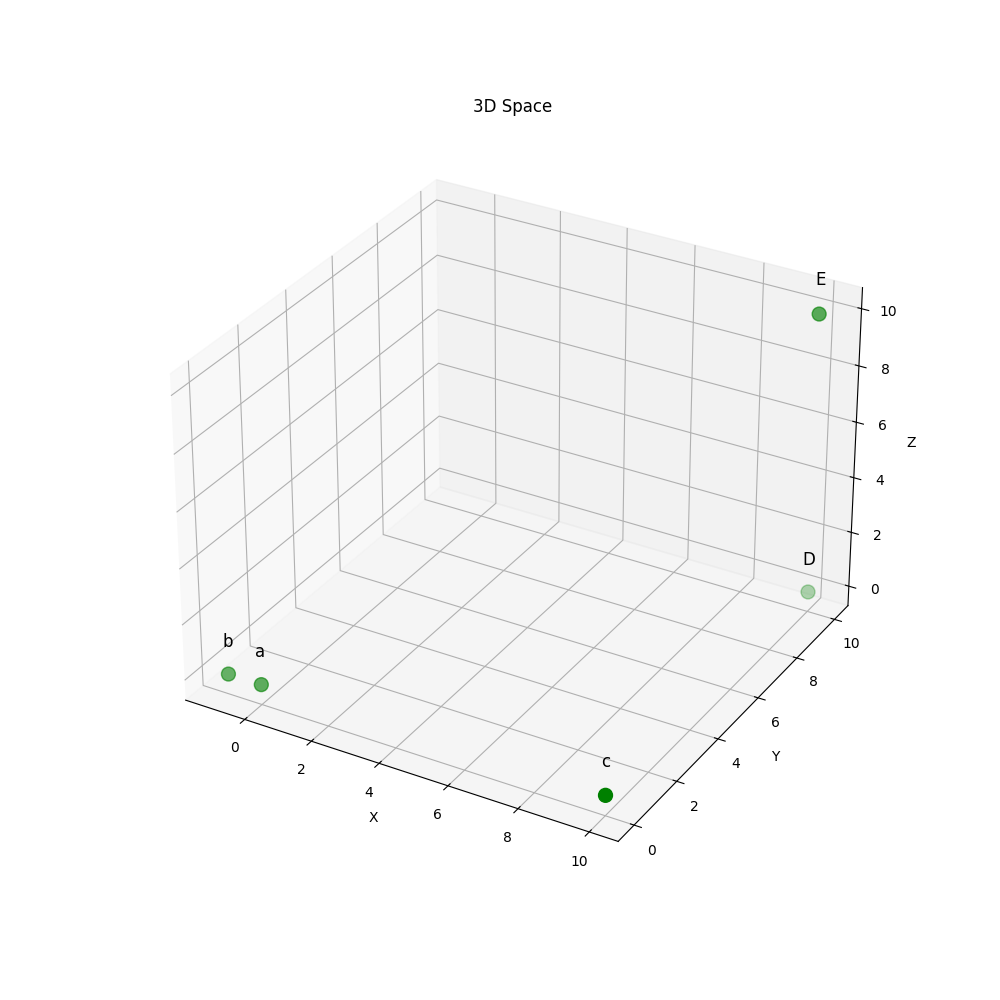

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Define 3D points (Previous points get z=0)
points_3d = {
    'a': (0, 0, 0),
    'b': (-1, 0, 0),
    'c': (10, 0, 0),
    'D': (10, 10, 0),
    'E': (10, 10, 10)
}

xs = [p[0] for p in points_3d.values()]
ys = [p[1] for p in points_3d.values()]
zs = [p[2] for p in points_3d.values()]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='green', s=100)

for name, (x, y, z) in points_3d.items():
    ax.text(x, y, z + 1, f"{name}", ha='center', fontsize=12)

ax.set_title("3D Space")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

## Why "Distance" Loses Meaning in High Dimensions

One of the most counter-intuitive concepts in data science is the **Curse of Dimensionality**. As humans, we think in 1D, 2D, and 3D. In these low dimensions, if we pick a random point in a unit square (or cube), it is intuitively "close" to the center.

However, modern AI works in massive dimensions. A simple word embedding might have 768 dimensions (BERT) or even 12,288 dimensions (GPT-3).

### The Geometric Intuition
The code above visualizes the distance from the origin $(0,0,...0)$ to the "corner" unit vector $(1,1,...1)$ as we increase dimensions.

* **1D (Line):** The point is at $1$. Distance is $\sqrt{1} = 1$.
* **2D (Square):** The point is at $(1,1)$. Distance is the diagonal $\sqrt{1^2+1^2} \approx 1.41$.
* **3D (Cube):** The point is at $(1,1,1)$. Distance is the space diagonal $\sqrt{1^2+1^2+1^2} \approx 1.73$.
* **100D (Hypercube):** The point is at $(1,1,...1)$. Distance is $\sqrt{100} = 10$.

### The Consequence for AI
As dimensions increase, the "volume" of the space expands exponentially.
1.  **Data Sparsity:** To cover a 100-dimensional space as densely as we cover a 1-dimensional line with 100 points, we would need $100^{100}$ data points. We never have enough data to fill high-dimensional space.
2.  **Distance Concentration:** As seen in the table, points move further and further away from the center. In very high dimensions, *all* random points tend to be equidistant from each other. This makes traditional distance metrics (like Euclidean distance) less useful for clustering because "everything is far away from everything else."

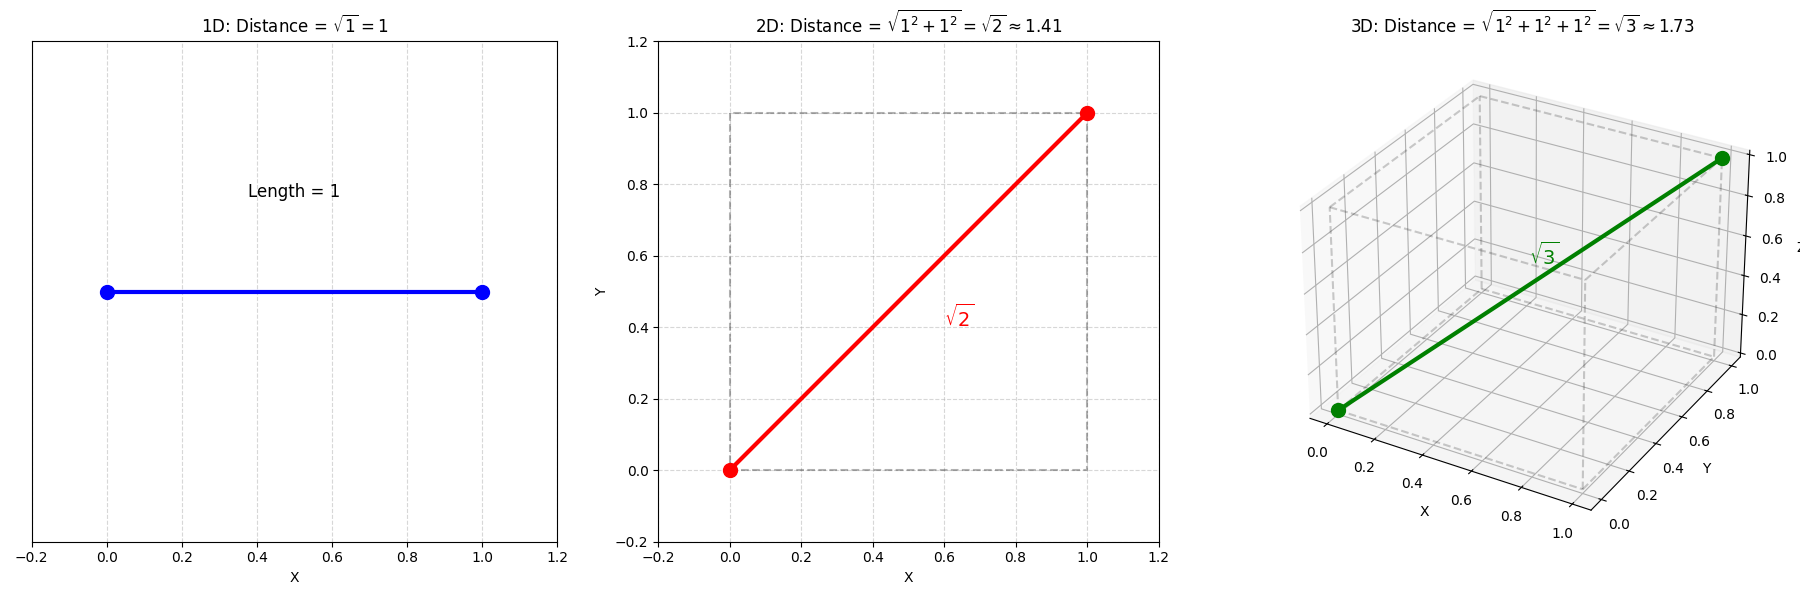

Dim   | Point Coordinates         | Calculation     | Distance  
-----------------------------------------------------------------
1     | (1,)                      | sqrt(1)         | 1.00000
2     | (1, 1)                    | sqrt(2)         | 1.41421
3     | (1, 1, 1)                 | sqrt(3)         | 1.73205
4     | (1, 1, ..., 1)            | sqrt(4)         | 2.00000
5     | (1, 1, ..., 1)            | sqrt(5)         | 2.23607
6     | (1, 1, ..., 1)            | sqrt(6)         | 2.44949
7     | (1, 1, ..., 1)            | sqrt(7)         | 2.64575
8     | (1, 1, ..., 1)            | sqrt(8)         | 2.82843
9     | (1, 1, ..., 1)            | sqrt(9)         | 3.00000
10    | (1, 1, ..., 1)            | sqrt(10)        | 3.16228


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(18, 6))

# --- 1D Plot ---
ax1 = fig.add_subplot(131)
ax1.set_title(r"1D: Distance = $\sqrt{1} = 1$")
ax1.plot([0, 1], [0, 0], 'b-o', markersize=10, linewidth=3, label="Vector")
ax1.text(0.5, 0.02, "Length = 1", ha='center', va='bottom', fontsize=12)
ax1.set_yticks([])
ax1.set_xlabel("X")
ax1.set_xlim(-0.2, 1.2)
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# --- 2D Plot ---
ax2 = fig.add_subplot(132)
ax2.set_title(r"2D: Distance = $\sqrt{1^2+1^2} = \sqrt{2} \approx 1.41$")
# Square outline
square_x = [0, 1, 1, 0, 0]
square_y = [0, 0, 1, 1, 0]
ax2.plot(square_x, square_y, 'k--', alpha=0.3, label="Unit Square")
# Diagonal
ax2.plot([0, 1], [0, 1], 'r-o', markersize=10, linewidth=3, label="Vector")
ax2.text(0.6, 0.4, r"$\sqrt{2}$", fontsize=14, color='red')
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_aspect('equal')
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)
ax2.grid(True, linestyle='--', alpha=0.5)

# --- 3D Plot ---
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title(r"3D: Distance = $\sqrt{1^2+1^2+1^2} = \sqrt{3} \approx 1.73$")

# Manually plot edges for the unit cube
r = [0, 1]
for x in r:
    for y in r:
        ax3.plot([x, x], [y, y], [0, 1], 'k--', alpha=0.2)
for x in r:
    for z in r:
        ax3.plot([x, x], [0, 1], [z, z], 'k--', alpha=0.2)
for y in r:
    for z in r:
        ax3.plot([0, 1], [y, y], [z, z], 'k--', alpha=0.2)

# Diagonal (0,0,0) to (1,1,1)
ax3.plot([0, 1], [0, 1], [0, 1], 'g-o', markersize=10, linewidth=3, label="Vector")
ax3.text(0.5, 0.5, 0.6, r"$\sqrt{3}$", fontsize=14, color='green')

ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")

plt.tight_layout()
plt.show()

# --- Print Table ---
print(f"{'Dim':<5} | {'Point Coordinates':<25} | {'Calculation':<15} | {'Distance':<10}")
print("-" * 65)
for d in range(1, 11):
    dist = np.sqrt(d)
    if d <= 3:
        coord = str(tuple([1]*d))
    else:
        coord = "(1, 1, ..., 1)"

    calc = f"sqrt({d})"
    print(f"{d:<5} | {coord:<25} | {calc:<15} | {dist:.5f}")